In [ ]:
# This is a topic modelling application that takes a textual dataset, cleans it,
# extracts topic models from it and then generates a visualization depicting the
# coherence of each model and how they fare against each other.

In [ ]:
!pip install pyLDAvis

In [ ]:
# Importing libraries to be used by the application
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import os, re, operator, warnings
warnings.filterwarnings('ignore')  
%matplotlib inline

In [ ]:
# Cleaning the dataset
def clean(text):
    return str(''.join([i if ord(i) < 128 else ' ' for i in text]))

# Using the Lee Corpus dataset
test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
lee_train_file = test_data_dir + os.sep + 'lee_background.cor'
text = open(lee_train_file).read()

In [ ]:
# Importing spaCy for large-scale data extraction
import spacy
nlp = spacy.load("en")

In [ ]:
# Adding stop words
my_stop_words = [u'say', u'\'s', u'Mr', u'be', u'said', u'says', u'saying']
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True
texts, article, skl_texts = [], [], []
for w in doc:
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
        
        # Adding the lemmatized version of the word
        article.append(w.lemma_)
    
    # New line represents start of a new document
    if w.text == '\n':
        skl_texts.append(' '.join(article))
        texts.append(article)
        article = []

In [ ]:
doc = nlp(clean(text))

In [ ]:
doc

Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year's Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at this

In [ ]:
# Adding bigram to catch words like New York or Taj Mahal as one word
bigram = gensim.models.Phrases(texts)

In [ ]:
texts = [bigram[line] for line in texts]

In [ ]:
# Displaying data to show bigrams were created
texts[0][0:10]

['hundred',
 'people',
 'force',
 'vacate',
 'home',
 'Southern',
 'Highlands',
 'New_South',
 'Wales',
 'strong']

In [ ]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
corpus[7][0:10]

[(5, 1),
 (10, 1),
 (16, 1),
 (53, 1),
 (67, 1),
 (69, 1),
 (170, 1),
 (221, 1),
 (230, 1),
 (364, 1)]

In [ ]:
# Generating topics under the LSI Model
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [ ]:
# Showing the 10 topics
lsimodel.show_topics(num_topics=10)

[(0,
  '-0.239*"israeli" + -0.214*"Arafat" + -0.196*"palestinian" + -0.175*"force" + -0.159*"kill" + -0.159*"official" + -0.151*"attack" + -0.141*"people" + -0.118*"day" + -0.117*"Israel"'),
 (1,
  '0.313*"israeli" + 0.300*"Arafat" + 0.269*"palestinian" + -0.162*"Afghanistan" + 0.161*"Sharon" + -0.159*"Australia" + 0.154*"Israel" + 0.127*"Hamas" + 0.122*"West_Bank" + -0.116*"day"'),
 (2,
  '-0.261*"Afghanistan" + -0.222*"force" + -0.185*"Al_Qaeda" + -0.176*"bin_Laden" + 0.171*"fire" + -0.143*"Pakistan" + -0.140*"Taliban" + 0.140*"Sydney" + -0.134*"fighter" + -0.132*"Tora_Bora"'),
 (3,
  '-0.380*"fire" + -0.274*"area" + -0.206*"Sydney" + 0.205*"Australia" + -0.175*"firefighter" + -0.161*"north" + -0.153*"wind" + -0.138*"Wales" + -0.138*"New_South" + -0.132*"south"'),
 (4,
  '0.277*"company" + 0.208*"Qantas" + 0.181*"union" + -0.168*"test" + 0.149*"worker" + -0.141*"win" + -0.136*"match" + -0.132*"South_Africa" + -0.119*"wicket" + -0.116*"day"'),
 (5,
  '-0.425*"metre" + -0.339*"win" + -

In [ ]:
# Generating topics under the HDP Model
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [ ]:
# Showing all topics since the model figures out a number by itself
hdpmodel.show_topics()

[(0,
  '0.005*Arafat + 0.005*Sharon + 0.005*israeli + 0.004*palestinian + 0.004*choose + 0.003*group + 0.003*Government + 0.002*official + 0.002*attack + 0.002*air_strike + 0.002*West_Bank + 0.002*terrorism + 0.002*kill + 0.002*office + 0.002*Gaza_Strip + 0.002*militant + 0.002*call + 0.002*year + 0.002*state + 0.002*australian'),
 (1,
  '0.003*hit + 0.002*airport + 0.002*force + 0.002*Taliban + 0.002*area + 0.002*storm + 0.002*north + 0.002*fighter + 0.002*damage + 0.002*night + 0.001*Sydney + 0.001*come + 0.001*kill + 0.001*opposition + 0.001*Kandahar + 0.001*end + 0.001*leave + 0.001*natural + 0.001*Bloomberg + 0.001*Agha'),
 (2,
  '0.003*director + 0.003*Friedli + 0.003*company + 0.002*brain + 0.002*reply + 0.002*israeli + 0.002*know + 0.002*human + 0.002*embryo + 0.002*carry + 0.002*Indiana + 0.001*day + 0.001*think + 0.001*team + 0.001*cell + 0.001*research + 0.001*region + 0.001*mistake + 0.001*official + 0.001*swiss'),
 (3,
  '0.003*match + 0.003*Rafter + 0.002*israeli + 0.002*

In [ ]:
# Generating topics under the LDA Model
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [ ]:
# Showing the 10 topics
ldamodel.show_topics()

[(0,
  '0.004*"Arafat" + 0.004*"israeli" + 0.004*"people" + 0.004*"palestinian" + 0.004*"kill" + 0.004*"child" + 0.004*"official" + 0.004*"attack" + 0.003*"Sharon" + 0.003*"lead"'),
 (1,
  '0.005*"Australia" + 0.004*"people" + 0.004*"man" + 0.003*"israeli" + 0.003*"tell" + 0.003*"official" + 0.003*"think" + 0.003*"month" + 0.003*"attack" + 0.003*"go"'),
 (2,
  '0.005*"day" + 0.004*"Australia" + 0.004*"today" + 0.004*"year" + 0.003*"report" + 0.003*"tell" + 0.003*"take" + 0.003*"force" + 0.003*"government" + 0.003*"place"'),
 (3,
  '0.005*"area" + 0.005*"people" + 0.004*"Australia" + 0.003*"year" + 0.003*"wind" + 0.003*"expect" + 0.003*"Sydney" + 0.003*"australian" + 0.003*"work" + 0.003*"wicket"'),
 (4,
  '0.006*"people" + 0.005*"israeli" + 0.005*"company" + 0.004*"australian" + 0.003*"Qantas" + 0.003*"official" + 0.003*"palestinian" + 0.003*"day" + 0.003*"month" + 0.003*"week"'),
 (5,
  '0.005*"force" + 0.005*"people" + 0.004*"day" + 0.004*"time" + 0.003*"new" + 0.003*"year" + 0.003*"

In [ ]:
# Interactive Visualization of topics under LDA model
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.007970 -0.047815       1        1  15.492255
2     -0.055249 -0.028930       2        1  13.385178
4     -0.001099 -0.031825       3        1  12.179886
5      0.014340 -0.002953       4        1  10.602141
6      0.002674  0.028160       5        1  10.599667
7     -0.037649  0.008549       6        1  10.437186
1      0.026699 -0.013186       7        1   7.311150
0      0.066186  0.014529       8        1   7.143472
3     -0.052070  0.045405       9        1   6.892629
8      0.028197  0.028067      10        1   5.956437, topic_info=             Term       Freq      Total Category  logprob  loglift
847       israeli  77.000000  77.000000  Default  30.0000  30.0000
2203       Arafat  55.000000  55.000000  Default  29.0000  29.0000
854   palestinian  62.000000  62.000000  Default  28.0000  28.0000
888         metre  25.000000  25.000000  Default  27.0000  27.0000
2096        child  40.000000  40.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
318    Government   3.721482  59.170499  Topic10  -6.1338   0.0544
894        report   3.799866  70.270899  Topic10  -6.1129  -0.0967
850         month   3.310231  50.795408  Topic10  -6.2509   0.0899
467         think   3.304967  57.873961  Topic10  -6.2525  -0.0421
59          force   3.388912  90.654302  Topic10  -6.2274  -0.4658

[808 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
645       1  0.111532           
645       2  0.111532           
645       3  0.111532           
645       4  0.133839           
645       5  0.133839           
...     ...       ...        ...
179       7  0.047863  yesterday
179       8  0.047863  yesterday
179       9  0.047863  yesterday
179      10  0.071794  yesterday
5039      5  0.598444      youth

[2370 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 3, 5, 6, 7, 8, 2, 1, 4, 9])

In [ ]:
# Interactive Visualization of topics under HDP model
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(hdpmodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster          Freq
topic                                                   
0      0.118826  0.024300       1        1  1.245728e+01
1      0.049496 -0.055857       2        1  4.550519e+00
4      0.019987 -0.011724       3        1  2.951993e+00
5      0.032729 -0.016188       4        1  2.530452e+00
3      0.063468  0.007501       5        1  2.376086e+00
...         ...       ...     ...      ...           ...
142    0.001875 -0.023307     146        1  3.344622e-08
143   -0.014482 -0.010916     147        1  1.996330e-08
145   -0.010952  0.023489     148        1  7.750342e-09
147   -0.012704  0.004646     149        1  2.127981e-09
148   -0.013063 -0.004320     150        1  1.245672e-09

[150 rows x 5 columns], topic_info=             Term          Freq      Total  Category  logprob  loglift
2203       Arafat  2.300000e+01  23.000000   Default  30.0000  30.0000
3452       Sharon  2.100000e+01  21.000000   Default  29.0000  29.0000
847       israeli  2.500000e+01  25.000000   Default  28.0000  28.0000
854   palestinian  1.900000e+01  19.000000   Default  27.0000  27.0000
3835       choose  1.500000e+01  15.000000   Default  26.0000  26.0000
...           ...           ...        ...       ...      ...      ...
4021  contingency  3.180944e-10   4.570423  Topic150  -7.0285   1.7205
5623       Arabia  3.428712e-10   6.183836  Topic150  -6.9535   1.4932
3035      faction  3.537439e-10   7.101569  Topic150  -6.9223   1.3860
5785        saudi  3.225045e-10   5.152587  Topic150  -7.0147   1.6144
486          Swan  3.196940e-10   5.220174  Topic150  -7.0235   1.5926

[6182 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
645       1  0.386322           
364       1  0.255095          $
364       2  0.127547          $
364      18  0.127547          $
3857      1  0.173767     -PRON-
...     ...       ...        ...
179       8  0.079140  yesterday
179      11  0.079140  yesterday
3520      1  0.230139     yorker
2809      1  0.293757       zone
2809      2  0.146879       zone

[2430 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 6, 4, 24, 13, 9, 3, 14, 11, 18, 8, 10, 12, 17, 16, 7, 21, 19, 56, 20, 15, 28, 58, 27, 26, 34, 43, 105, 49, 44, 23, 77, 109, 39, 25, 51, 48, 31, 113, 80, 59, 55, 108, 85, 111, 89, 41, 68, 124, 36, 52, 53, 33, 120, 99, 30, 116, 22, 64, 81, 88, 135, 50, 115, 131, 71, 117, 46, 29, 40, 69, 37, 132, 57, 63, 79, 100, 72, 47, 118, 61, 86, 67, 32, 35, 45, 66, 122, 123, 65, 145, 104, 75, 142, 90, 110, 76, 91, 106, 38, 134, 78, 83, 95, 112, 102, 150, 60, 84, 98, 92, 127, 97, 93, 126, 147, 54, 70, 107, 42, 73, 101, 62, 74, 82, 87, 94, 96, 103, 114, 119, 121, 125, 128, 129, 130, 133, 136, 137, 138, 139, 140, 141, 143, 144, 146, 148, 149])

In [ ]:
# Finding coherence of the models
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [ ]:
# Plotting a bar graph
def evaluate_bar_graph(coherences, indices):

    # coherences: list of coherence values
    # indices: Indices to be used to mark bars
    
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Topic Models')
    plt.ylabel('Coherence Values')

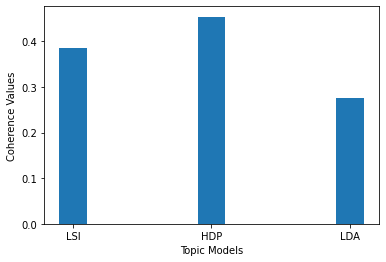

In [ ]:
# Displaying the bar graph
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])